In [54]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 12]

##Fits file importing:
#Use glob to create arrays of all the filepaths to the necessary .fit files
bias_path_arr = glob.glob(".\CCDbias*.fit") #Array of CCD bias frames
dark_300s_path_arr = glob.glob(".\CCDdark300*.fit") #Array of CCD dark frames w/ t_exp=300s
dark_120s_path_arr = glob.glob(".\CCDdark120*.fit") #Array of CCD dark frames w/ t_exp=120s
dark_60s_path_arr = glob.glob(".\CCDdark60*.fit") #Array of CCD dark frames w/ t_exp=60s
dark_10s_path_arr = glob.glob(".\CCDdark10*.fit") #Array of CCD dark frames w/ t_exp=10s
dark_1s_path_arr = glob.glob(".\CCDdark1_*.fit") #Array of CCD dark frames w/ t_exp=1s
dark_01s_path_arr = glob.glob(".\CCDdark01*.fit") #Array of CCD dark frames w/ t_exp=0.1s
dark_003s_path_arr = glob.glob(".\CCDdark003*.fit") #Array of CCD dark frames w/ t_exp=0.03s
flat_I_path_arr = glob.glob(".\I_flat*.fit") #Array of twilight flats in I filter
flat_U_path_arr = glob.glob(".\*flat_08*.fit") #Array of twilight flats in U filter
flat_V_path_arr = glob.glob(".\V_flat*.fit") #Array of twilight flats in V filter

#Create array of opened .fit files (returned as HDUlist files):
bias_fits_arr = [fits.open(path) for path in bias_path_arr]
dark_300s_fits_arr = [fits.open(path) for path in dark_300s_path_arr]
dark_120s_fits_arr = [fits.open(path) for path in dark_120s_path_arr]
dark_60s_fits_arr = [fits.open(path) for path in dark_60s_path_arr]
dark_10s_fits_arr = [fits.open(path) for path in dark_10s_path_arr]
dark_1s_fits_arr = [fits.open(path) for path in dark_1s_path_arr]
dark_01s_fits_arr = [fits.open(path) for path in dark_01s_path_arr]
dark_003s_fits_arr = [fits.open(path) for path in dark_003s_path_arr]
flat_I_fits_arr = [fits.open(path) for path in flat_I_path_arr]
flat_U_fits_arr = [fits.open(path) for path in flat_U_path_arr]
flat_V_fits_arr = [fits.open(path) for path in flat_V_path_arr]

#Extract image data array from HDUlist files, and create arrays matching their exposure times for later DC removal:
bias_img_arr = [hdu[0].data for hdu in bias_fits_arr]
dark_300s_img_arr = [hdu[0].data for hdu in dark_300s_fits_arr]
dark_120s_img_arr = [hdu[0].data for hdu in dark_120s_fits_arr]
dark_60s_img_arr = [hdu[0].data for hdu in dark_60s_fits_arr]
dark_10s_img_arr = [hdu[0].data for hdu in dark_10s_fits_arr]
dark_1s_img_arr = [hdu[0].data for hdu in dark_1s_fits_arr]
dark_01s_img_arr = [hdu[0].data for hdu in dark_01s_fits_arr]
dark_003s_img_arr = [hdu[0].data for hdu in dark_003s_fits_arr]
flat_I_img_arr = [hdu[0].data for hdu in flat_I_fits_arr]
flat_I_exp_arr = [0.3 for x in range(len(flat_I_img_arr))]
flat_U_img_arr = [hdu[0].data for hdu in flat_U_fits_arr]
flat_U_exp_arr = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1, 1, 1, 1.5]
flat_V_img_arr = [hdu[0].data for hdu in flat_V_fits_arr]
flat_V_exp_arr = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.4, 0.4]

In [55]:
##Averaging and master-frame creation:

#Create bias master frame:
master_frames = []
bias_master = np.median(bias_img_arr, axis=0)
master_frames.append(bias_master)

#Create dark master frames by averaging and subtracting bias master:
'''
Because the dark masters are made with equal exposure times, the bias master can be subtracted off before or after averaging; for the
flat frames where the exposure times are not always consistent, this subtraction must be performed before averaging.
'''
dark_300s_master = np.median(dark_300s_img_arr, axis=0)
dark_300s_master = dark_300s_master - bias_master
master_frames.append(dark_300s_master)
dark_120s_master = np.median(dark_120s_img_arr, axis=0)
dark_120s_master = dark_120s_master - bias_master
master_frames.append(dark_120s_master)
dark_60s_master = np.median(dark_60s_img_arr, axis=0)
dark_60s_master = dark_60s_master - bias_master
master_frames.append(dark_60s_master)
dark_10s_master = np.median(dark_10s_img_arr, axis=0)
dark_10s_master = dark_10s_master - bias_master
master_frames.append(dark_10s_master)
dark_1s_master = np.median(dark_1s_img_arr, axis=0)
dark_1s_master = dark_1s_master - bias_master
master_frames.append(dark_1s_master)
dark_01s_master = np.median(dark_01s_img_arr, axis=0)
dark_01s_master = dark_01s_master - bias_master
master_frames.append(dark_01s_master)
dark_003s_master = np.median(dark_003s_img_arr, axis=0)
dark_003s_master = dark_003s_master - bias_master
master_frames.append(dark_003s_master)

C:\Users\Garrett\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\Garrett\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


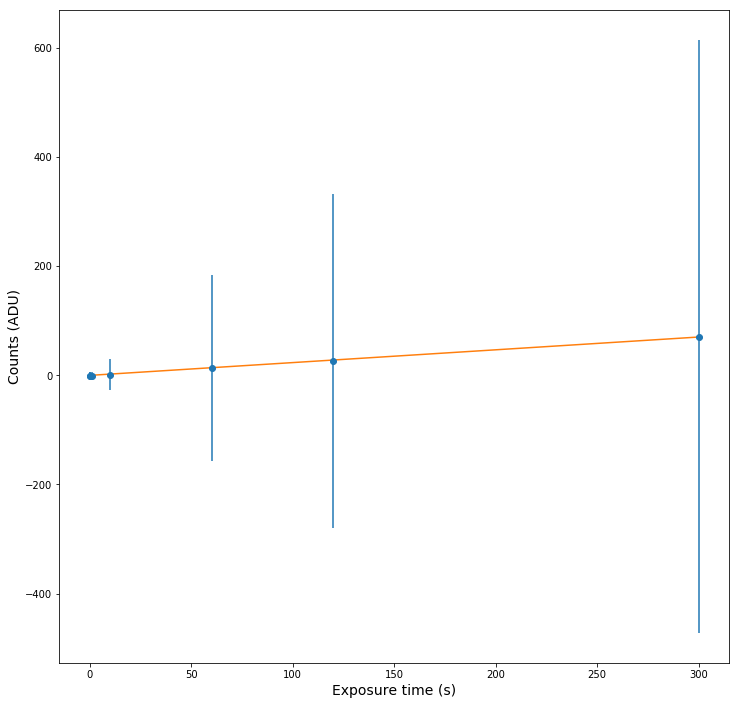

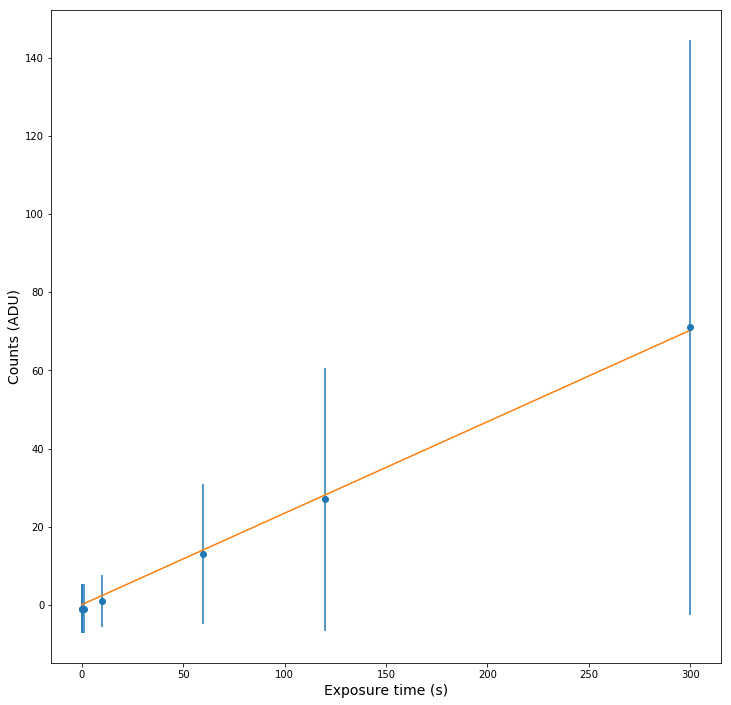

m = 0.23430742958944897
m_adj = 0.23430742958944897
Stddevs = [543.5707417974729, 306.38938315774476, 170.3769666617498, 28.31781803418711, 6.797096058961623, 6.280078459062751, 6.275141435122861]
Adjstds = [73.54809646696965, 33.598786490071426, 17.846284232742217, 6.685577422028163, 6.265975779841994, 6.2320343457925365, 6.2342607058713435]
Slope error = 289.58550804121126
Adjusted slope error = 37.465596125008645


In [56]:
##Dark current averaging and fitting:
'''
Note: we appear to have some randomly saturated pixels in our longer-exposure dark frames, so I created some masks to ignore these pixels
when averaging/calculating error for the purpose of comparison. These pixels' values scaled linearly with time, as expected for dark current,
but for some reason they were 3-4 orders of magnitude higher than the average. I included both fitted values/plots in my report for comparison
'''
#Note: mins/maxes were used for cursory inspection of effect of poorly-behaved pixels
dark_exposures = [300, 120, 60, 10, 1, 0.1, 0.03]
dark_medians = []
dark_stddevs = []
dark_mins = []
dark_maxs = []

#Loop through dark masters and append desired data:
for i in range (1,len(master_frames)):
    dark_medians.append(np.median(master_frames[i]))
    dark_stddevs.append(np.std(master_frames[i]))
    dark_mins.append(np.min(master_frames[i]))
    dark_maxs.append(np.max(master_frames[i]))

#Create masks to ignore poorly-behaved pixels (i.e. w/ values >num_stddevs above average pixel value and use them to recalculate adjusted medians and stddevs:
dark_master_masks = []
adjusted_dark_medians = []
adjusted_dark_stddevs = []
num_stddevs = 3

for i in range (1,len(master_frames)):
    dark_master_masks.append(master_frames[i]<(dark_medians[i-1] + num_stddevs*dark_stddevs[i-1]))
    adjusted_dark_medians.append(np.median(master_frames[i][dark_master_masks[i-1]]))
    adjusted_dark_stddevs.append(np.std(master_frames[i][dark_master_masks[i-1]]))
    
#Use numpy's least-squares fitting because, physically speaking, the y-intercept of our dark-current function should be 0
dark_exposures_vert = np.reshape(dark_exposures, (len(dark_exposures),1))
m = np.linalg.lstsq(dark_exposures_vert,dark_medians)[0][0]
fit_line = [(m*x) for x in dark_exposures]

m_adj = np.linalg.lstsq(dark_exposures_vert,adjusted_dark_medians)[0][0]
adj_fit_line = [(m_adj*x) for x in dark_exposures]

#Dark current linear time-dependence plots:
plt.errorbar(dark_exposures, dark_medians, yerr=dark_stddevs, fmt="o")
plt.plot(dark_exposures, fit_line)
#plt.title('Median Dark Current vs. Exposure Time', size='18')
plt.ylabel('Counts (ADU)', size='14')
plt.xlabel('Exposure time (s)', size='14')
plt.savefig('darkcurrentvstime.pdf')
plt.show()

plt.errorbar(dark_exposures, adjusted_dark_medians, yerr=adjusted_dark_stddevs, fmt="o")
plt.plot(dark_exposures, adj_fit_line)
#plt.title('Adjusted Median Dark Current vs. Exposure Time', size='18')
plt.ylabel('Counts (ADU)', size='14')
plt.xlabel('Exposure time (s)', size='14')
plt.savefig('adjdarkcurrentvstime.pdf')
plt.show()

print("m = " + str(m) + "\nm_adj = " + str(m_adj))
print("Stddevs = " + str(dark_stddevs) + "\nAdjstds = " + str(adjusted_dark_stddevs))

#Calculate error on fitted slopes:
'''
Note: From http://www.stat.yale.edu/Courses/1997-98/101/linregin.htm, the variance of the fitted value is 
given by the mean-square-error of the fitted pairs; the error is then the square root of this variance.
'''
mse = (np.sum([std**2 for std in dark_stddevs]))/(len(dark_stddevs)-2)
err = mse**0.5

adj_mse = (np.sum([std**2 for std in adjusted_dark_stddevs]))/(len(dark_stddevs)-2)
adj_err = adj_mse**0.5

print("Slope error = " + str(err))
print("Adjusted slope error = " + str(adj_err))

In [57]:
##Create flat masters:
#Find expected dark current for subtraction by multiplying the exposure times by the above slope:
flat_I_darks = [exp * m for exp in flat_I_exp_arr]
flat_U_darks = [exp * m for exp in flat_U_exp_arr]
flat_V_darks = [exp * m for exp in flat_V_exp_arr]

#Subtract biases off of each flat frame:
flat_I_img_arr = [arr - bias_master for arr in flat_I_img_arr]
flat_U_img_arr = [arr - bias_master for arr in flat_U_img_arr]
flat_V_img_arr = [arr - bias_master for arr in flat_V_img_arr]

#Subtract expected DC off of each flat frame:
for i in range (0,10):
    flat_I_img_arr[i] = [val - flat_I_darks[i] for val in flat_I_img_arr[i]]
    flat_U_img_arr[i] = [val - flat_U_darks[i] for val in flat_U_img_arr[i]]
    flat_V_img_arr[i] = [val - flat_V_darks[i] for val in flat_V_img_arr[i]]
    
#Finally, take median of each frame; median is chosen to avoid interference of potentially random ill-behaved pixels from above:
flat_I_master = np.median(flat_I_img_arr, axis=0)
master_frames.append(flat_I_master)
flat_U_master = np.median(flat_U_img_arr, axis=0)
master_frames.append(flat_U_master)
flat_V_master = np.mean(flat_V_img_arr, axis=0)
master_frames.append(flat_V_master) 

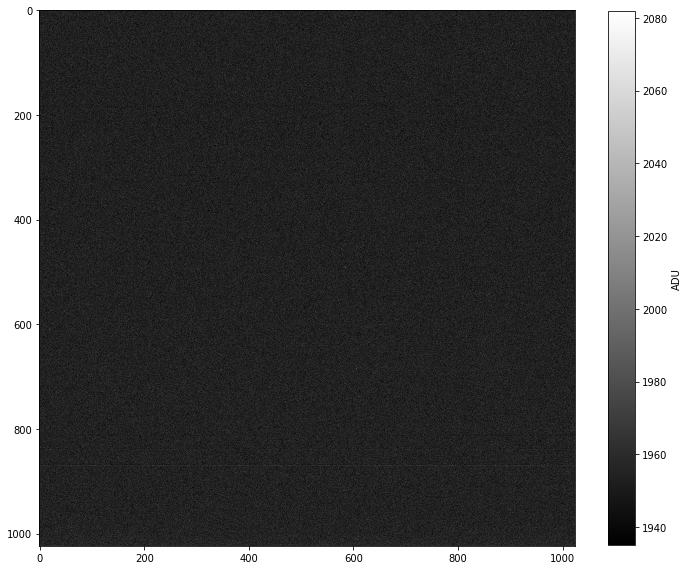

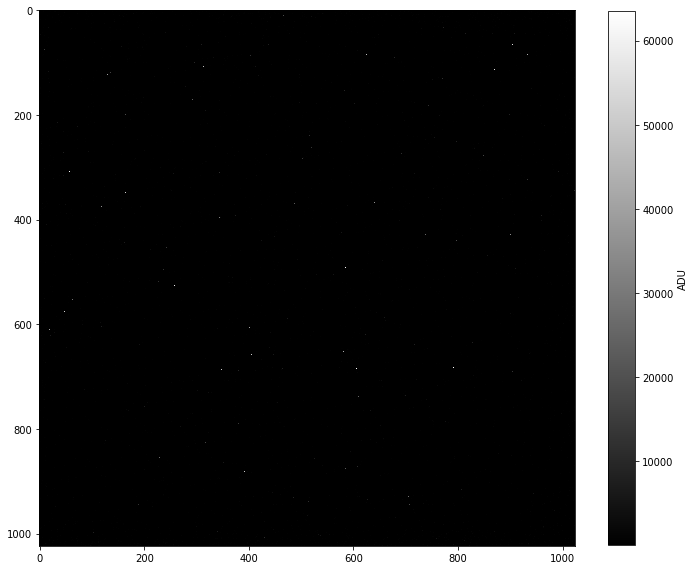

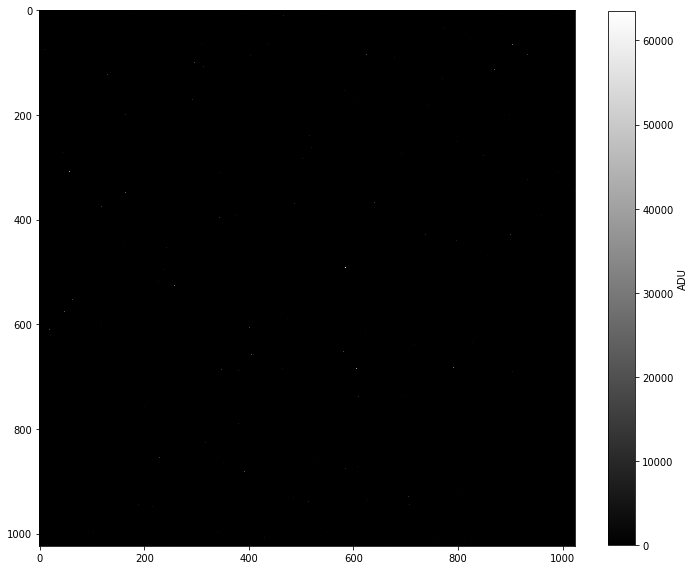

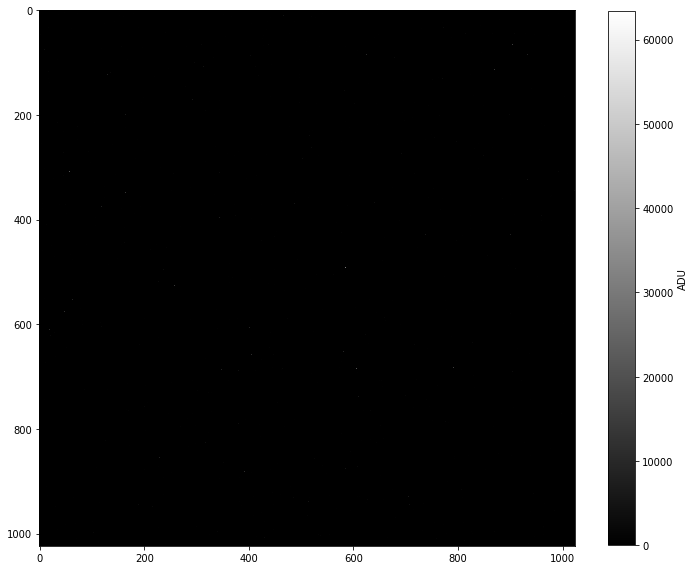

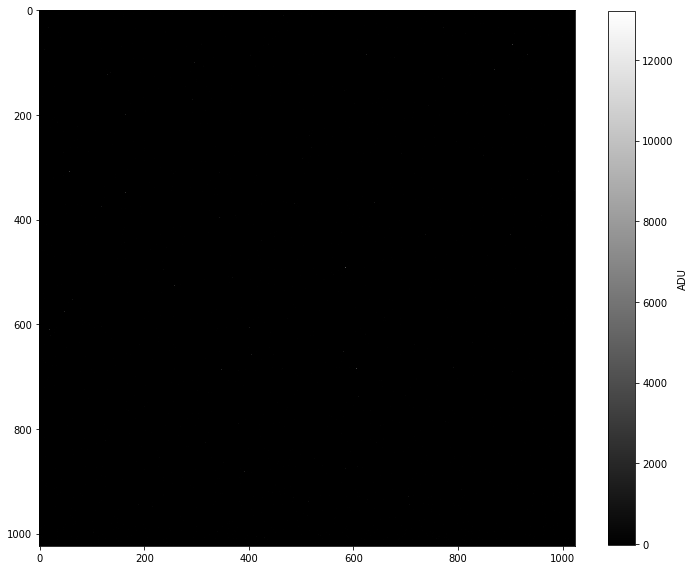

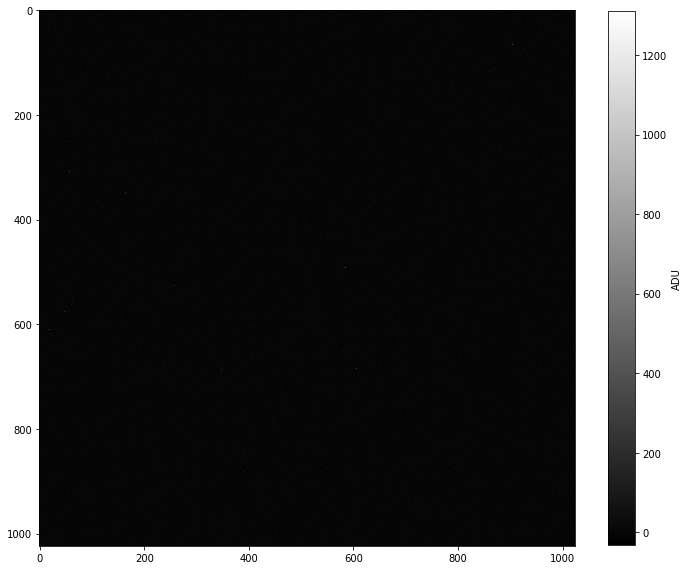

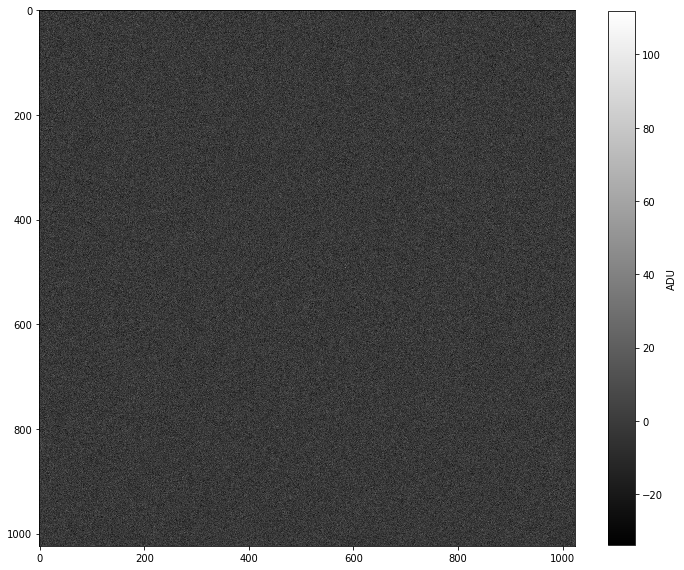

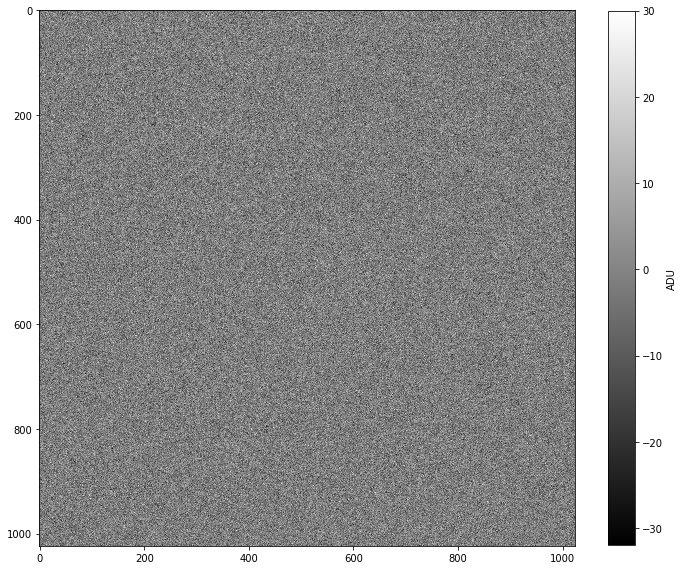

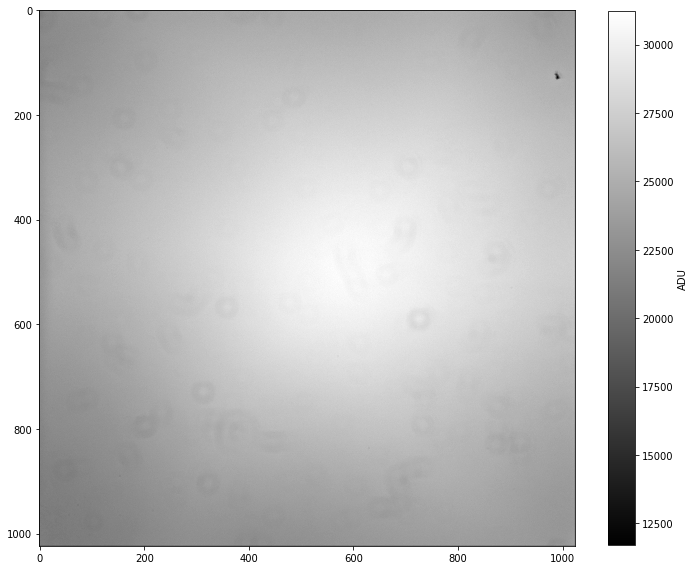

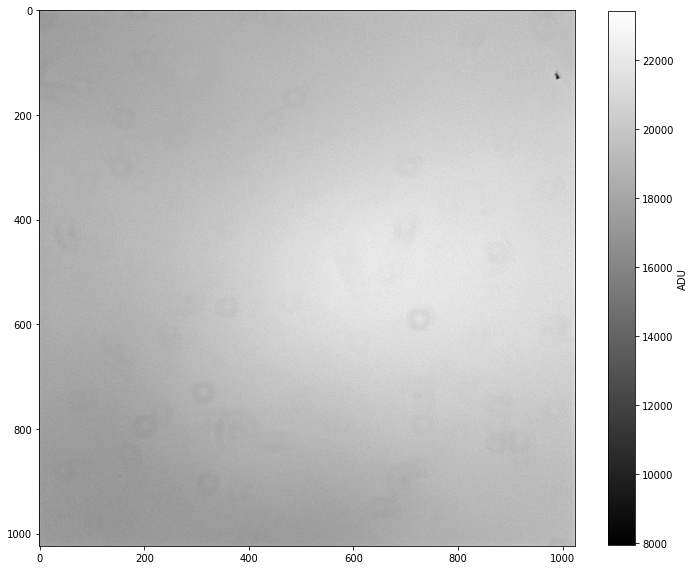

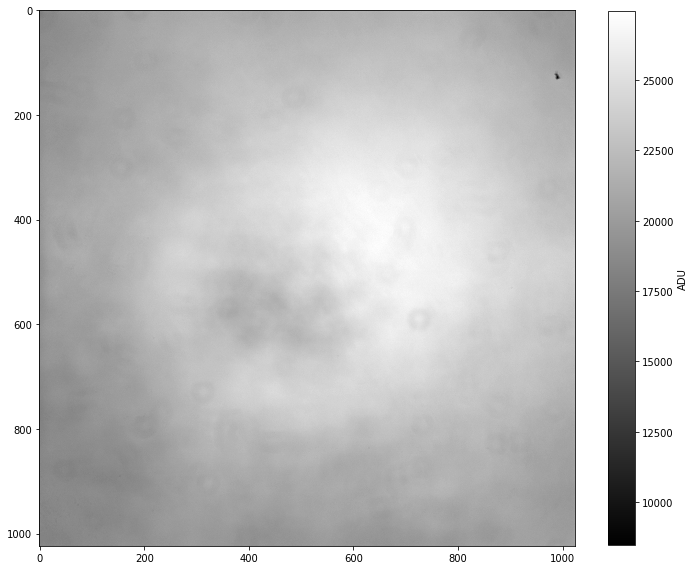

In [58]:
##Master plots for report:
#Bias master:
plt.imshow(bias_master, cmap='gray')
plt.colorbar(label='ADU', shrink=0.82)
#plt.title('Bias Master Frame', size='18')
plt.savefig('biasmasterframe.pdf')
plt.show()

#Dark masters:
plt.imshow(dark_300s_master, cmap='gray')
plt.colorbar(label='ADU', shrink=0.82)
#plt.title('Dark Master Frame (t_exp=300s)', size='18')
plt.savefig('dark300smasterframe.pdf')
plt.show()

plt.imshow(dark_120s_master, cmap='gray')
plt.colorbar(label='ADU', shrink=0.82)
#plt.title('Dark Master Frame (t_exp=120s)', size='18')
plt.savefig('dark120smasterframe.pdf')
plt.show()

plt.imshow(dark_60s_master, cmap='gray')
plt.colorbar(label='ADU', shrink=0.82)
#plt.title('Dark Master Frame (t_exp=60s)', size='18')
plt.savefig('dark60smasterframe.pdf')
plt.show()

plt.imshow(dark_10s_master, cmap='gray')
plt.colorbar(label='ADU', shrink=0.82)
#plt.title('Dark Master Frame (t_exp=10s)', size='18')
plt.savefig('dark10smasterframe.pdf')
plt.show()

plt.imshow(dark_1s_master, cmap='gray')
plt.colorbar(label='ADU', shrink=0.82)
#plt.title('Dark Master Frame (t_exp=1s)', size='18')
plt.savefig('dark1smasterframe.pdf')
plt.show()

plt.imshow(dark_01s_master, cmap='gray')
plt.colorbar(label='ADU', shrink=0.82)
#plt.title('Dark Master Frame (t_exp=0.1s)', size='18')
plt.savefig('dark01smasterframe.pdf')
plt.show()

plt.imshow(dark_003s_master, cmap='gray')
plt.colorbar(label='ADU', shrink=0.82)
#plt.title('Dark Master Frame (t_exp=0.03s)', size='18')
plt.savefig('dark003smasterframe.pdf')
plt.show()

#Flat master frames:
plt.imshow(flat_I_master, cmap='gray')
plt.colorbar(label='ADU', shrink=0.82)
#plt.title('I-filter Flat Master', size='18')
plt.savefig('Ifiltermasterframe.pdf')
plt.show()

plt.imshow(flat_U_master, cmap='gray')
plt.colorbar(label='ADU', shrink=0.82)
#plt.title('U-filter Flat Master', size='18')
plt.savefig('Ufiltermasterframe.pdf')
plt.show()

plt.imshow(flat_V_master, cmap='gray')
plt.colorbar(label='ADU', shrink=0.82)
#plt.title('V-filter Flat Master', size='18')
plt.savefig('Vfiltermasterframe.pdf')
plt.show()

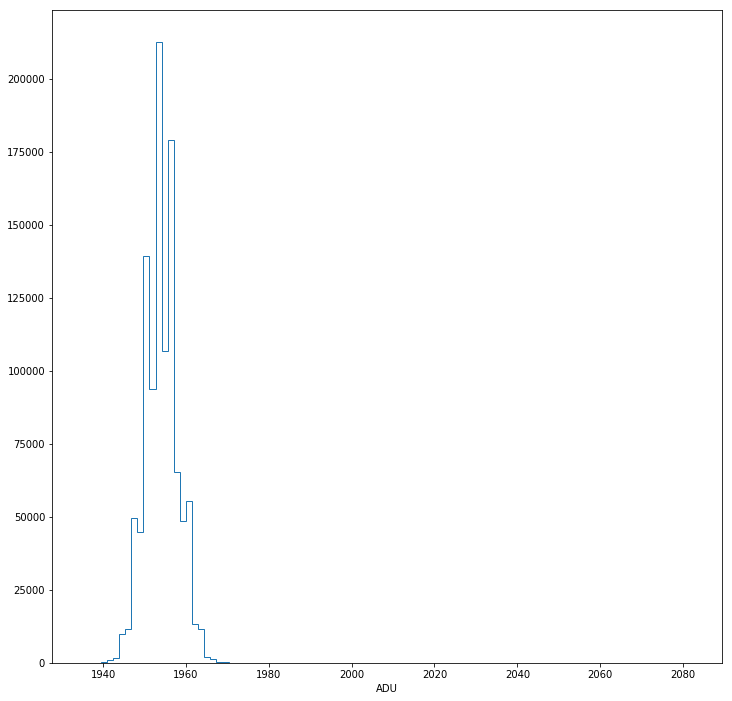

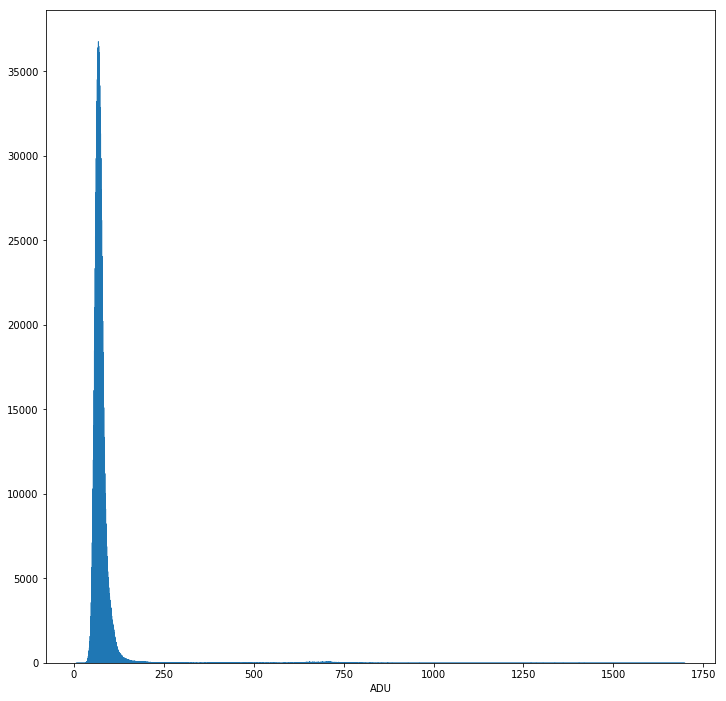

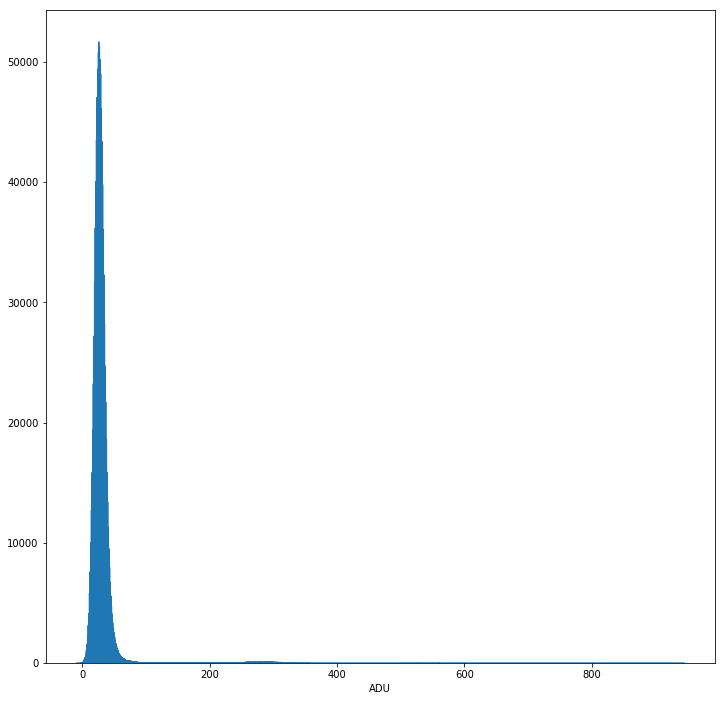

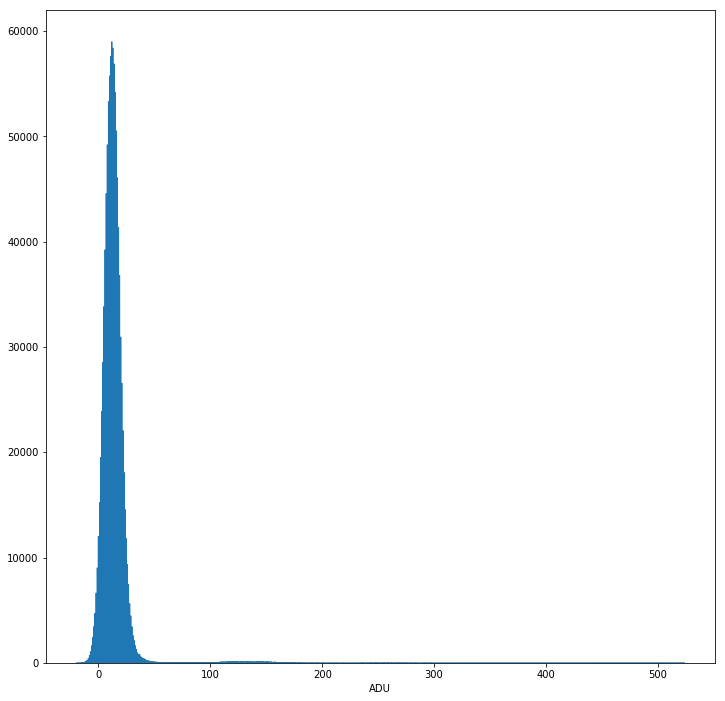

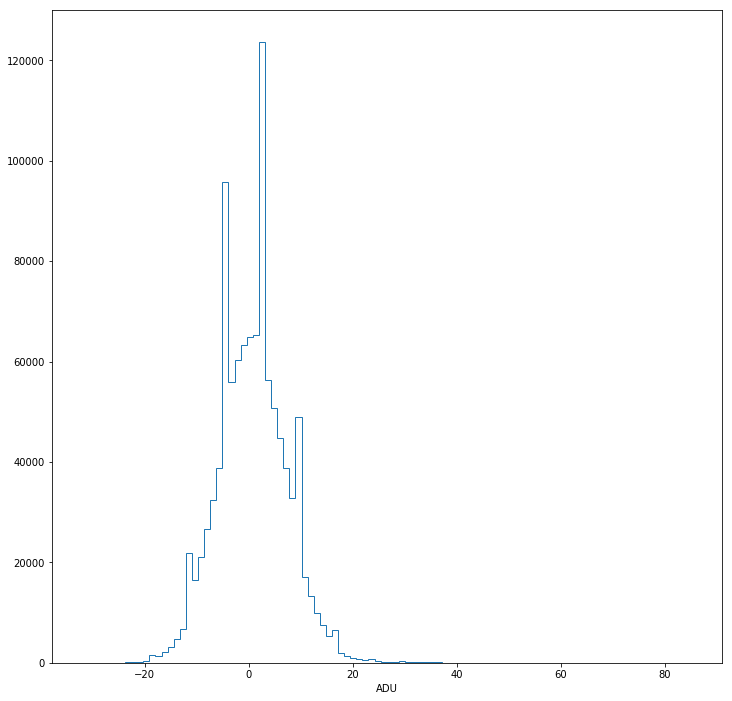

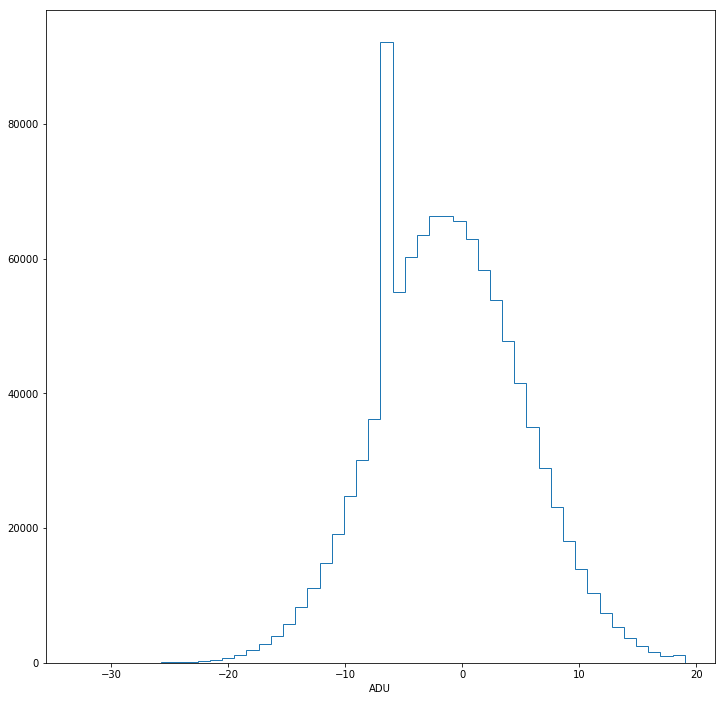

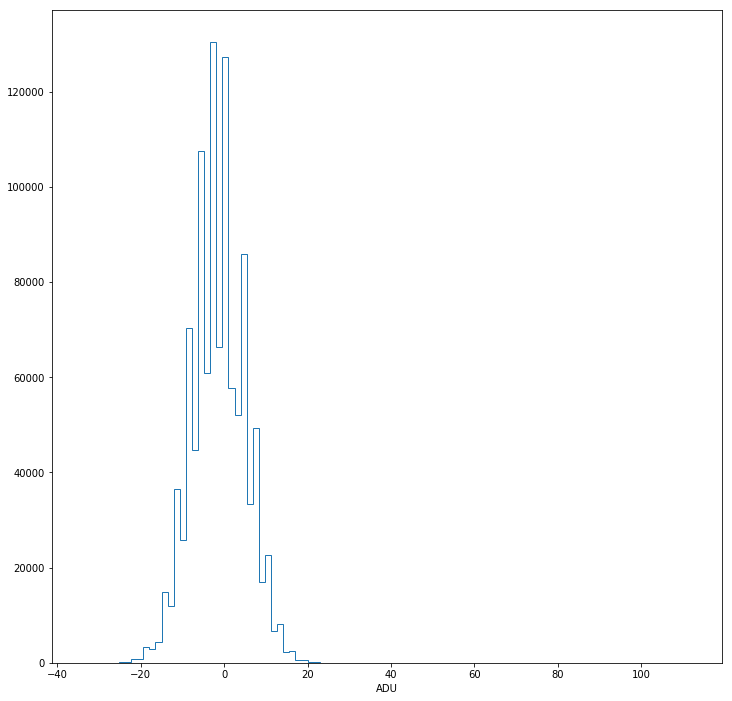

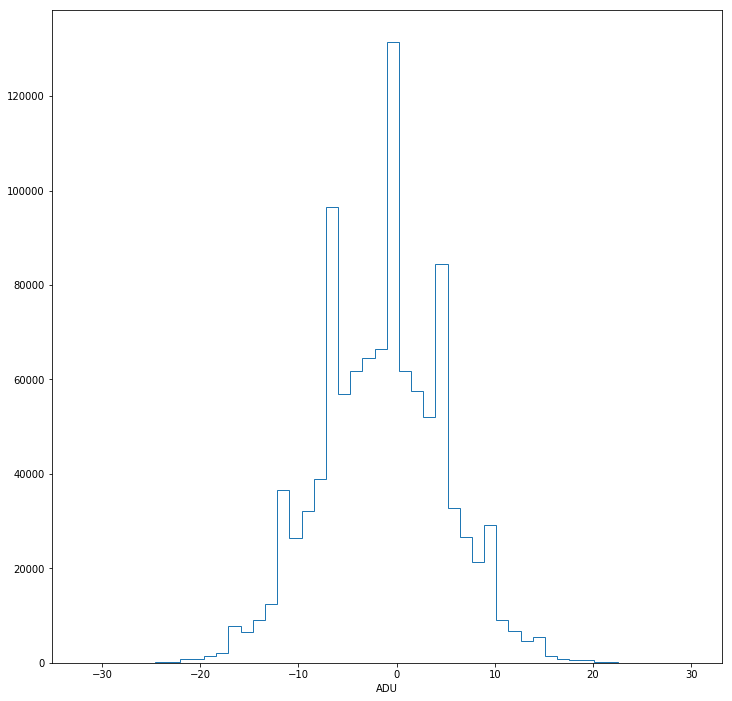

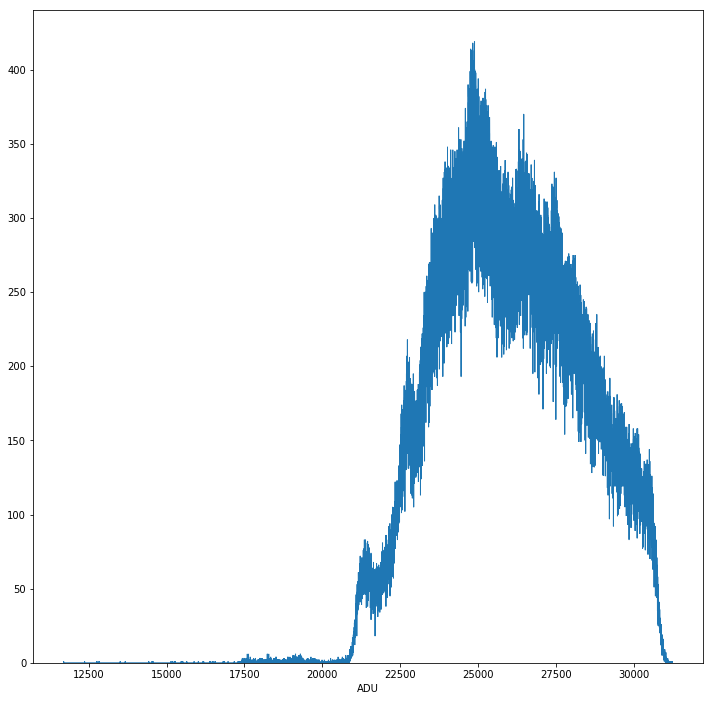

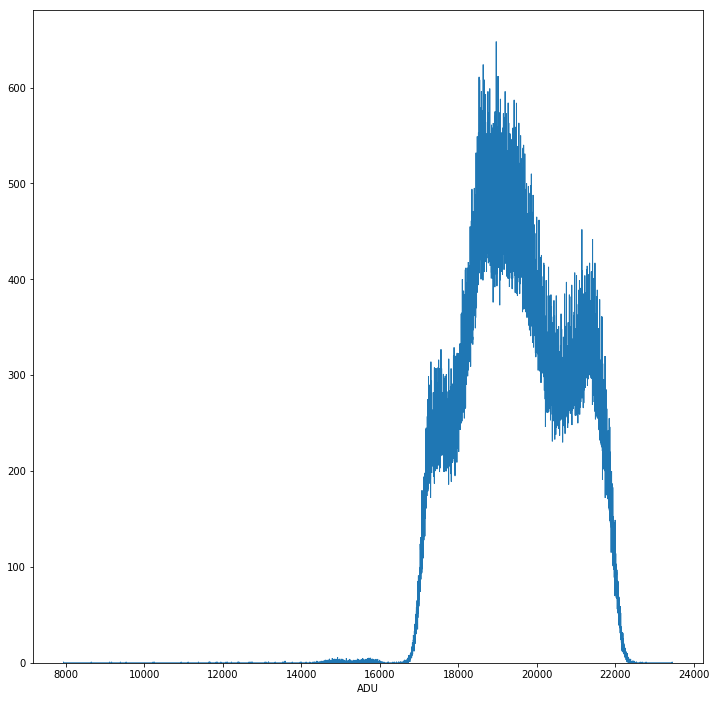

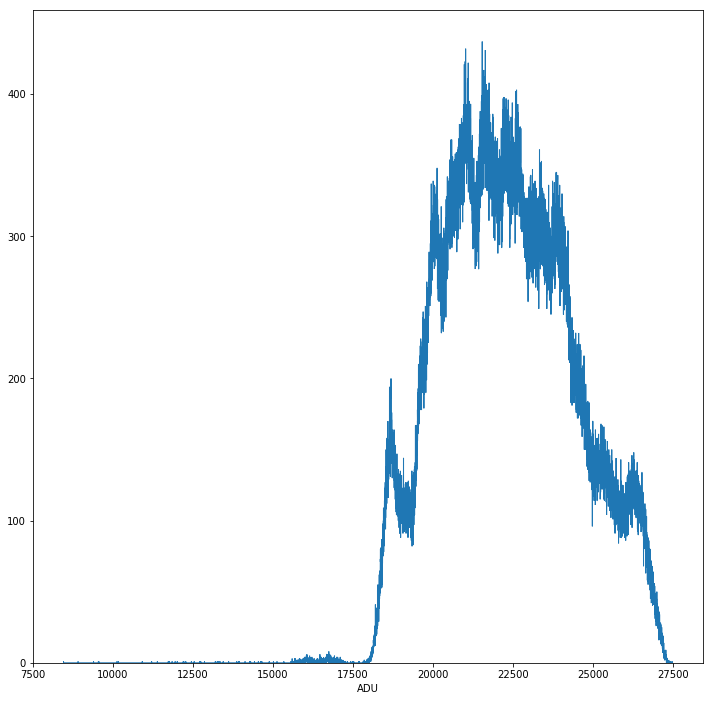

In [65]:
##Create histograms of master frames:
#Bias master histogram
plt.hist(np.ndarray.flatten(bias_master), bins=100, histtype='step')
#plt.title('Bias Master Frame Histogram')
plt.xlabel('ADU')
plt.savefig('biasmasterhist.pdf')
plt.show()

#Dark master histograms
#Note: I used the masks to produce these histograms because the oddly-behaved pixels made the spread of the histogram difficult to discern
plt.hist(np.ndarray.flatten(dark_300s_master[dark_master_masks[0]]), bins=10000, histtype='step')
#plt.title('Dark Master Frame (t_exp=300s) Histogram')
plt.xlabel('ADU')
plt.savefig('dark300smasterhist.pdf')
plt.show()

plt.hist(np.ndarray.flatten(dark_120s_master[dark_master_masks[1]]), bins=10000, histtype='step')
#plt.title('Dark Master Frame (t_exp=120s) Histogram')
plt.xlabel('ADU')
plt.savefig('dark120smasterhist.pdf')
plt.show()

plt.hist(np.ndarray.flatten(dark_60s_master[dark_master_masks[2]]), bins=10000, histtype='step')
#plt.title('Dark Master Frame (t_exp=60s) Histogram')
plt.xlabel('ADU')
plt.savefig('dark60smasterhist.pdf')
plt.show()

plt.hist(np.ndarray.flatten(dark_10s_master[dark_master_masks[3]]), bins=100, histtype='step')
#plt.title('Dark Master Frame (t_exp=10s) Histogram')
plt.xlabel('ADU')
plt.savefig('dark10smasterhist.pdf')
plt.show()

plt.hist(np.ndarray.flatten(dark_1s_master[dark_master_masks[4]]), bins=50, histtype='step')
#plt.title('Dark Master Frame (t_exp=1s) Histogram')
plt.xlabel('ADU')
plt.savefig('dark1smasterhist.pdf')
plt.show()

plt.hist(np.ndarray.flatten(dark_01s_master), bins=100, histtype='step')
#plt.title('Dark Master Frame (t_exp=0.1s) Histogram')
plt.xlabel('ADU')
plt.savefig('dark01smasterhist.pdf')
plt.show()

plt.hist(np.ndarray.flatten(dark_003s_master), bins=50, histtype='step')
#plt.title('Dark Master Frame (t_exp=0.03s) Histogram')
plt.xlabel('ADU')
plt.savefig('dark003smasterhist.pdf')
plt.show()

#Flat master frames histograms:
plt.hist(np.ndarray.flatten(flat_I_master), bins=10000, histtype='step')
#plt.title('I-filter Flat Master Frame Histogram')
plt.xlabel('ADU')
plt.savefig('Ifiltermasterhist.pdf')
plt.show()

plt.hist(np.ndarray.flatten(flat_U_master), bins=10000, histtype='step')
#plt.title('U-filter Flat Master Frame Histogram')
plt.xlabel('ADU')
plt.savefig('Ufiltermasterhist.pdf')
plt.show()

plt.hist(np.ndarray.flatten(flat_V_master), bins=10000, histtype='step')
#plt.title('V-filter Flat Master Frame Histogram')
plt.xlabel('ADU')
plt.savefig('Vfiltermasterhist.pdf')
plt.show()

In [60]:
print(np.mean(bias_master))

1954.1327867507935
